# Speed difference between reading numerical data from plain CSV vs. using _.npy_ file format
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

In [1]:
import numpy as np
import time

### Number of samples

In [2]:
n_samples=1000000

### Reading from a CSV

In [3]:
with open('fdata.txt', 'w') as fdata:
    for _ in range(n_samples):
        fdata.write(str(10*np.random.random())+',')

In [4]:
t1=time.time()
array_direct = np.fromfile('fdata.txt',dtype=float, count=-1,sep=',').reshape(1000,1000)
t2=time.time()
print(array_direct)
print('\nShape: ',array_direct.shape)
print(f"Time took to read: {t2-t1} seconds.")

[[0.79069407 2.79264788 7.78010214 ... 8.67985377 5.55257576 6.63380363]
 [7.82258566 0.20014903 1.41525073 ... 7.05101166 9.19714586 5.20458313]
 [3.73702819 2.64382086 2.28656028 ... 0.88495059 2.02935994 7.00914684]
 ...
 [7.78463618 4.15066573 7.62901295 ... 8.2683873  9.80130484 6.25104443]
 [5.07043668 4.12035884 5.8887785  ... 3.45268772 3.34580485 9.28897288]
 [0.02954728 2.33390997 4.23928525 ... 7.15453709 5.02073548 1.51550383]]

Shape:  (1000, 1000)
Time took to read: 1.6509191989898682 seconds.


In [5]:
t1=time.time()
with open('fdata.txt','r') as fdata:
    datastr=fdata.read()
lst = datastr.split(',')
lst.pop()
array_lst=np.array(lst,dtype=float).reshape(1000,1000)
t2=time.time()
print(array_lst)
print('\nShape: ',array_lst.shape)
print(f"Time took to read: {t2-t1} seconds.")

[[0.79069407 2.79264788 7.78010214 ... 8.67985377 5.55257576 6.63380363]
 [7.82258566 0.20014903 1.41525073 ... 7.05101166 9.19714586 5.20458313]
 [3.73702819 2.64382086 2.28656028 ... 0.88495059 2.02935994 7.00914684]
 ...
 [7.78463618 4.15066573 7.62901295 ... 8.2683873  9.80130484 6.25104443]
 [5.07043668 4.12035884 5.8887785  ... 3.45268772 3.34580485 9.28897288]
 [0.02954728 2.33390997 4.23928525 ... 7.15453709 5.02073548 1.51550383]]

Shape:  (1000, 1000)
Time took to read: 0.5389654636383057 seconds.


### Save as a .npy file and read

In [6]:
np.save('fnumpy.npy',array_lst)

In [7]:
t1=time.time()
array_reloaded = np.load('fnumpy.npy')
t2=time.time()
print(array_reloaded)
print('\nShape: ',array_reloaded.shape)
print(f"Time took to load: {t2-t1} seconds.")

[[0.79069407 2.79264788 7.78010214 ... 8.67985377 5.55257576 6.63380363]
 [7.82258566 0.20014903 1.41525073 ... 7.05101166 9.19714586 5.20458313]
 [3.73702819 2.64382086 2.28656028 ... 0.88495059 2.02935994 7.00914684]
 ...
 [7.78463618 4.15066573 7.62901295 ... 8.2683873  9.80130484 6.25104443]
 [5.07043668 4.12035884 5.8887785  ... 3.45268772 3.34580485 9.28897288]
 [0.02954728 2.33390997 4.23928525 ... 7.15453709 5.02073548 1.51550383]]

Shape:  (1000, 1000)
Time took to load: 0.02336716651916504 seconds.


In [8]:
t1=time.time()
array_reloaded = np.load('fnumpy.npy').reshape(10000,100)
t2=time.time()
print(array_reloaded)
print('\nShape: ',array_reloaded.shape)
print(f"Time took to load: {t2-t1} seconds.")

[[0.79069407 2.79264788 7.78010214 ... 0.58501605 3.02512138 1.62227298]
 [2.36862622 5.58014723 1.17830832 ... 1.3599694  2.92832621 5.97991064]
 [8.99645105 2.69468737 5.50031807 ... 8.54662486 1.86510162 0.9401483 ]
 ...
 [9.07638179 8.81049742 7.06762782 ... 1.22593962 6.59391001 0.19797911]
 [1.5613063  3.03317505 4.65784817 ... 0.89528544 8.04649588 0.05569265]
 [9.92550606 8.21620003 8.23769044 ... 7.15453709 5.02073548 1.51550383]]

Shape:  (10000, 100)
Time took to load: 0.010059356689453125 seconds.


### Speed enhancement as the sample size grows...

In [9]:
n_samples=[100000*i for i in range(1,11)] 
time_lst_read=[]
time_npy_read=[]

for sample_size in n_samples:
    with open('fdata.txt', 'w') as fdata:
        for _ in range(sample_size):
            fdata.write(str(10*np.random.random())+',')

    t1=time.time()
    with open('fdata.txt','r') as fdata:
        datastr=fdata.read()
    lst = datastr.split(',')
    lst.pop()
    array_lst=np.array(lst,dtype=float)
    t2=time.time()
    time_lst_read.append(1000*(t2-t1))
    print("Array shape:",array_lst.shape)

    np.save('fnumpy.npy',array_lst)

    t1=time.time()
    array_reloaded = np.load('fnumpy.npy')
    t2=time.time()
    time_npy_read.append(1000*(t2-t1))
    print("Array shape:",array_reloaded.shape)
    
    print(f"Processing done for {sample_size} samples\n")

Array shape: (100000,)
Array shape: (100000,)
Processing done for 100000 samples

Array shape: (200000,)
Array shape: (200000,)
Processing done for 200000 samples

Array shape: (300000,)
Array shape: (300000,)
Processing done for 300000 samples

Array shape: (400000,)
Array shape: (400000,)
Processing done for 400000 samples

Array shape: (500000,)
Array shape: (500000,)
Processing done for 500000 samples

Array shape: (600000,)
Array shape: (600000,)
Processing done for 600000 samples

Array shape: (700000,)
Array shape: (700000,)
Processing done for 700000 samples

Array shape: (800000,)
Array shape: (800000,)
Processing done for 800000 samples

Array shape: (900000,)
Array shape: (900000,)
Processing done for 900000 samples

Array shape: (1000000,)
Array shape: (1000000,)
Processing done for 1000000 samples



In [10]:
import matplotlib.pyplot as plt

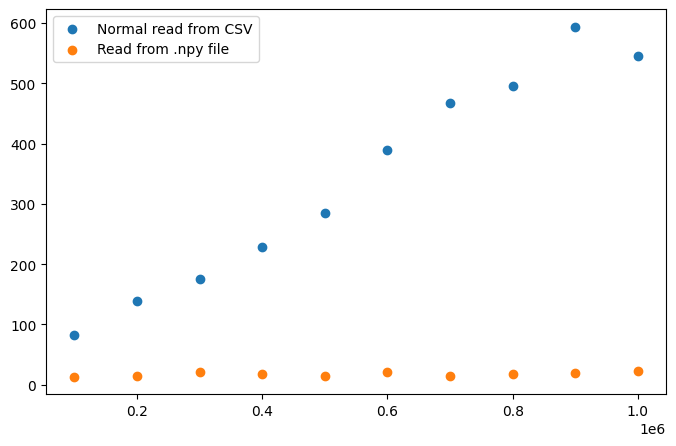

In [11]:
plt.figure(figsize=(8,5))
#plt.xscale('log')
#plt.yscale('log')
plt.scatter(n_samples,time_lst_read)
plt.scatter(n_samples,time_npy_read)
plt.legend(['Normal read from CSV','Read from .npy file'])
plt.show()